In [2]:
# Loading the libraries
import time, random
import pandas as pd

In [8]:
# Part 1 Merge Sort
def merge_array(My_array, l, m, r):
    n1_side = m - l + 1
    n2_side = r - m
    
    Left_arr = [0] * (n1_side)
    Right_arr = [0] * (n2_side)

    for i in range(0, n1_side):
        Left_arr[i] = My_array[l + i]

    for j in range(0, n2_side):
        Right_arr[j] = My_array[m + 1 + j]

    i,j,k = 0,0,l

    while i < n1_side and j < n2_side:
        if Left_arr[i] <= Right_arr[j]:
            My_array[k] = Left_arr[i]
            i = i + 1
        else:
            My_array[k] = Right_arr[j]
            j = j + 1
        k = k + 1

    while i < n1_side:
        My_array[k] = Left_arr[i]
        i = i + 1
        k = k + 1

    while j < n2_side:
        My_array[k] = Right_arr[j]
        j = j + 1
        k = k + 1

def merge_sort_array(My_array, start, end):
    if start < end:
        mid = start+(end-start)//2

        merge_sort_array(My_array, start, mid)
        merge_sort_array(My_array, mid+1, end)
        merge_array(My_array, start, mid, end)
        
    return My_array

In [9]:
arr = [10, 11, 3, 15, 26, 7]

n = len(arr)
print("Input array")
for i in range(n):
    print("%d" % arr[i],end=" ")

merge_sort_array(arr, 0, n-1)
print("\n\nOutput array")
for i in range(n):
    print("%d" % arr[i],end=" ")

Input array
10 11 3 15 26 7 

Output array
3 7 10 11 15 26 

In [4]:
# Part 2: Compile a table of average cases run times for Insertion Sort
def InsertionSort(array):
    for i in range(1, len(array)):
        key = array[i]
        j = i - 1
        while j >= 0 and key < array[j]:
            array[j + 1] = array[j]
            j -= 1

        array[j + 1] = key

    return array


Elements = []
Average_time_taken = []

for n in [10, 20, 50, 100, 200]:
    excution_taken = []

    for experiment in range(3):
        array = [random.randint(0, n) for _ in range(n)]
        start_time = time.time()
        sorted_array = InsertionSort(array)
        end_time = time.time()
        excution_taken.append(end_time - start_time)

    Elements.append(n)
    Average_time_taken.append(sum(excution_taken) / len(excution_taken))

Insertion_sort_df = pd.DataFrame()
Insertion_sort_df['No of Elements'] = Elements
Insertion_sort_df['Average Sorting time taken'] = Average_time_taken
Insertion_sort_df

,No of Elements,Average Sorting time taken
0,10,0.000000
1,20,0.000000
2,50,0.000665
3,100,0.001330
4,200,0.003816


In [4]:
# Part 3: Compile a table of average cases run times for Merge Sort
Elements = []
Average_time_taken = []

for n in [10, 20, 50, 100, 200]:
    time_taken = []

    for experiment in range(3):
        array = [random.randint(0, n) for _ in range(n)]
        t1 = time.time()
        sorted_array = merge_sort_array(array, 0, len(array) - 1)
        t2 = time.time()
        time_taken.append(t2 - t1)

    Elements.append(n)
    Average_time_taken.append(sum(time_taken) / len(time_taken))

Merge_sort_df = pd.DataFrame()
Merge_sort_df['No of Elements'] = Elements
Merge_sort_df['Average Sorting time taken'] = Average_time_taken
Merge_sort_df

,No of Elements,Average Sorting time taken
0,10,0.000000
1,20,0.000333
2,50,0.000332
3,100,0.000998
4,200,0.002327


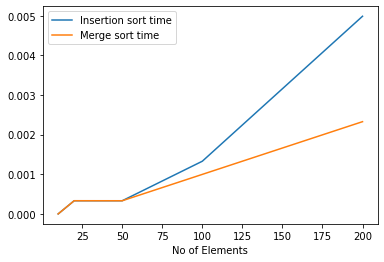

In [5]:
# Part 4: Create a graph comparing the average cases run times of Insertion Sort and Merge Sort.
Merged_df = pd.DataFrame()
Merged_df['No of Elements'] = Merge_sort_df['No of Elements']
Merged_df['Insertion sort time'] = Insertion_sort_df['Average Sorting time taken']
Merged_df['Merge sort time'] = Merge_sort_df['Average Sorting time taken']
Merged_df.set_index('No of Elements').plot()

Insertion Sort


,No of Elements,Average Sorting time taken
0,10,0.000000
1,20,0.000000
2,50,0.000333
3,100,0.006316
4,200,0.006981


Merge Sort


,No of Elements,Average Sorting time taken
0,10,0.000000
1,20,0.000000
2,50,0.000332
3,100,0.001330
4,200,0.001994


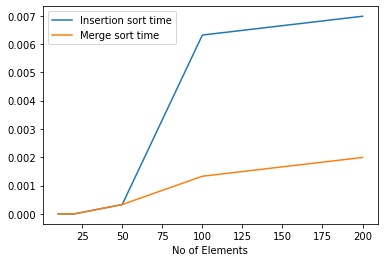

In [6]:
# Part 5: Repeat parts 2 through 4, but this time compile results for the best case.
# The best case random arrays
Elements = []
Average_time_taken = []

for n in [10, 20, 50, 100, 200]:
    time_taken = []

    for experiment in range(3):
        array = [random.randint(0, n) for _ in range(n)]
        t1 = time.time()
        sorted_array = InsertionSort(array)
        t2 = time.time()
        time_taken.append(t2 - t1)

    Elements.append(n)
    Average_time_taken.append(sum(time_taken) / len(time_taken))

Insertion_sort_df = pd.DataFrame()
Insertion_sort_df['No of Elements'] = Elements
Insertion_sort_df['Average Sorting time taken'] = Average_time_taken
print("Insertion Sort")
display(Insertion_sort_df)

Elements = []
Average_time_taken = []

for n in [10, 20, 50, 100, 200]:
    time_taken = []

    for experiment in range(3):
        array = [random.randint(0, n) for _ in range(n)]
        t1 = time.time()
        sorted_array =  merge_sort_array(array, 0, len(array) - 1)
        t2 = time.time()
        time_taken.append(t2 - t1)

    Elements.append(n)
    Average_time_taken.append(sum(time_taken) / len(time_taken))

Merge_sort_df = pd.DataFrame()
Merge_sort_df['No of Elements'] = Elements
Merge_sort_df['Average Sorting time taken'] = Average_time_taken
print("Merge Sort")
display(Merge_sort_df)

Combined_df = pd.DataFrame()
Combined_df['No of Elements'] = Merge_sort_df['No of Elements']
Combined_df['Insertion sort time'] = Insertion_sort_df['Average Sorting time taken']
Combined_df['Merge sort time'] = Merge_sort_df['Average Sorting time taken']
Combined_df.set_index('No of Elements').plot()

Insertion Sort


,No of Elements,Average Sorting time taken
0,10,0.000000
1,20,0.000000
2,50,0.000665
3,100,0.002327
4,200,0.002660


Merge Sort


,No of Elements,Average Sorting time taken
0,10,0.000000
1,20,0.000000
2,50,0.000332
3,100,0.000665
4,200,0.002327


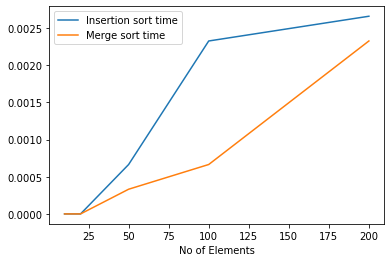

In [7]:
# Part 6: Repeat parts 2 through 4, but this time compile results for the worst case.
# The worst cases reverse sorted array
Elements = []
Average_time_taken = []

for n in [10, 20, 50, 100, 200]:
    time_taken = []

    for experiment in range(3):
        array = [i for i in range(n)][::-1]
        t1 = time.time()
        sorted_array = InsertionSort(array)
        t2 = time.time()
        time_taken.append(t2 - t1)

    Elements.append(n)
    Average_time_taken.append(sum(time_taken) / len(time_taken))

Insertion_sort_df = pd.DataFrame()
Insertion_sort_df['No of Elements'] = Elements
Insertion_sort_df['Average Sorting time taken'] = Average_time_taken
print("Insertion Sort")
display(Insertion_sort_df)

Elements = []
Average_time_taken = []

for n in [10, 20, 50, 100, 200]:
    time_taken = []

    for experiment in range(3):
        array = [i for i in range(n)][::-1]
        t1 = time.time()
        sorted_array =  merge_sort_array(array, 0, len(array) - 1)
        t2 = time.time()
        time_taken.append(t2 - t1)

    Elements.append(n)
    Average_time_taken.append(sum(time_taken) / len(time_taken))

Merge_sort_df = pd.DataFrame()
Merge_sort_df['No of Elements'] = Elements
Merge_sort_df['Average Sorting time taken'] = Average_time_taken
print("Merge Sort")
display(Merge_sort_df)

Combined_df = pd.DataFrame()
Combined_df['No of Elements'] = Merge_sort_df['No of Elements']
Combined_df['Insertion sort time'] = Insertion_sort_df['Average Sorting time taken']
Combined_df['Merge sort time'] = Merge_sort_df['Average Sorting time taken']
Combined_df.set_index('No of Elements').plot()